In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [55]:
acc_names = ['ax', 'ay', 'az']
rate_gyro_names = ['gx', 'gy', 'gz']
positions = ["Laying_down", "Standing_up", "Walking"]
pre_processed_dataframes = {}
sensors = ["Accelerometer", "Gyroscope"]

# Data analysis

In [56]:
def read_csv(filename : str, names : list[str]) -> pd.DataFrame:
    return pd.read_csv(filename, usecols=[1, 2, 3], names=names, skiprows=[0])

In [57]:
def read_recordings() -> dict[str:pd.DataFrame]:
    recordings = {}
    
    for position in positions:
        for i in range(1, 4):
            for sensor in sensors:
                dataframe = (
                    read_csv(f"Data/ML_Lab_1_{position}_{i}/{sensor}.csv", names=acc_names 
                    if sensor == "Accelerometer"
                    else rate_gyro_names)
                )
                recordings[f"{position} {sensor} {i}"] = dataframe
            
    return recordings
        

##### Plot the accelerometer values using the plot functions accessible for panda dataframes. Plot all accelerometer values, i.e. all samples for all components of the accelerometer vector.

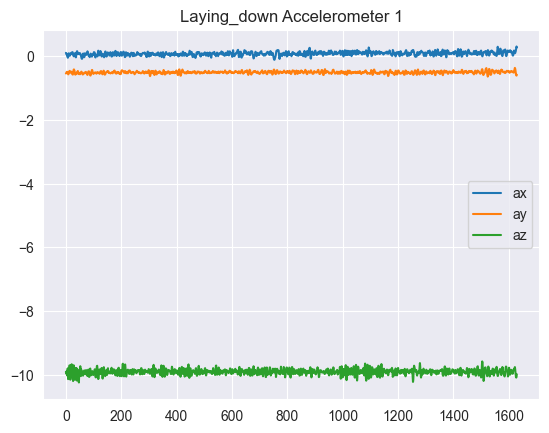

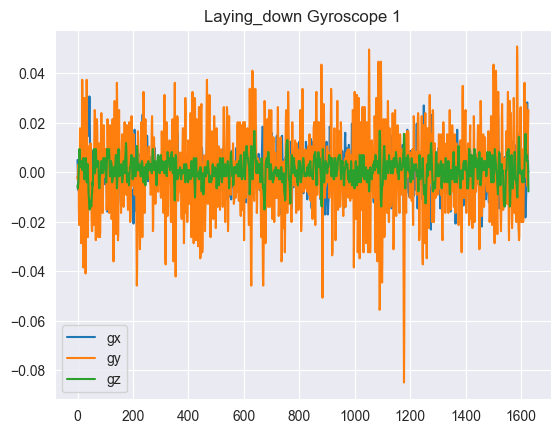

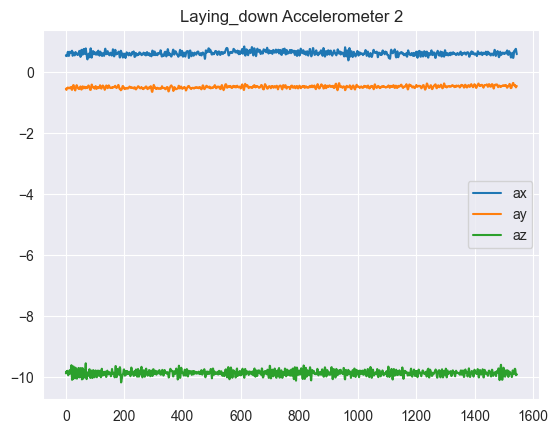

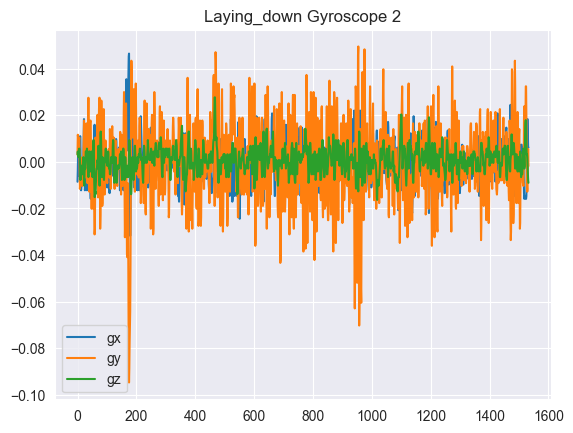

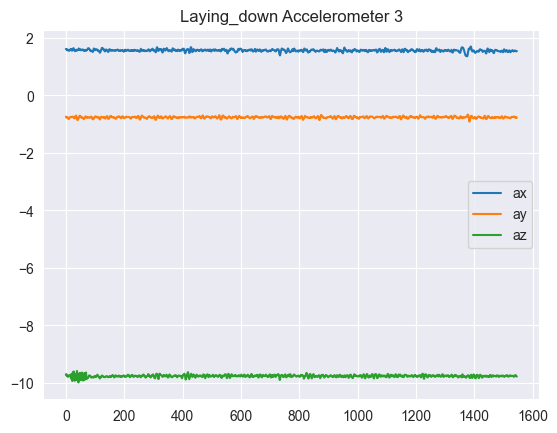

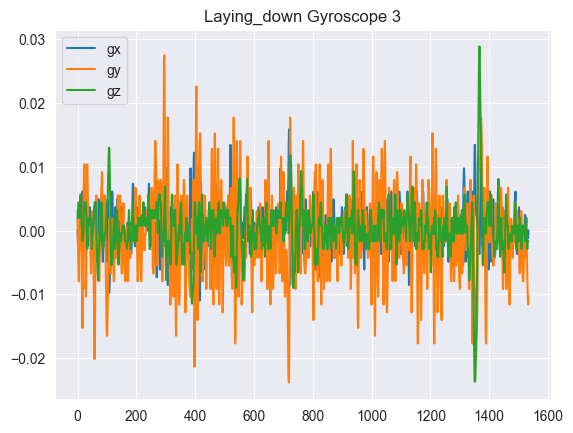

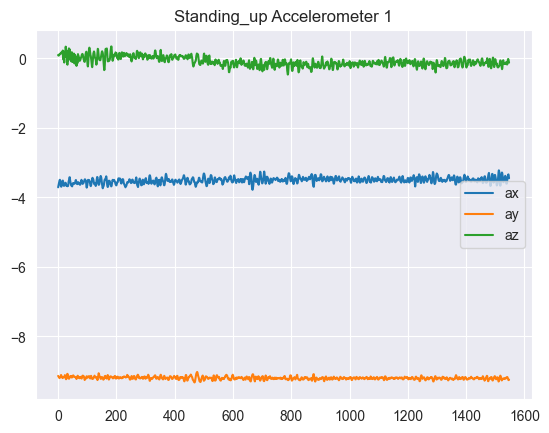

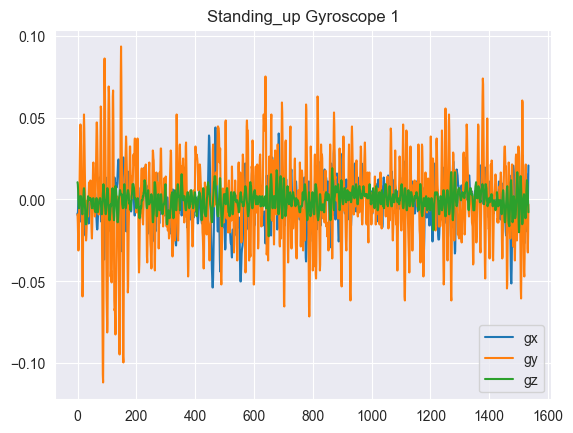

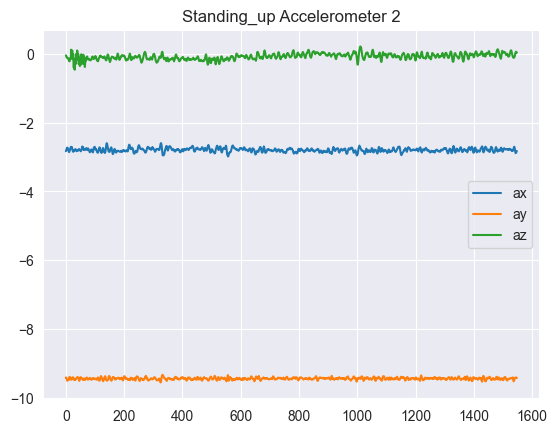

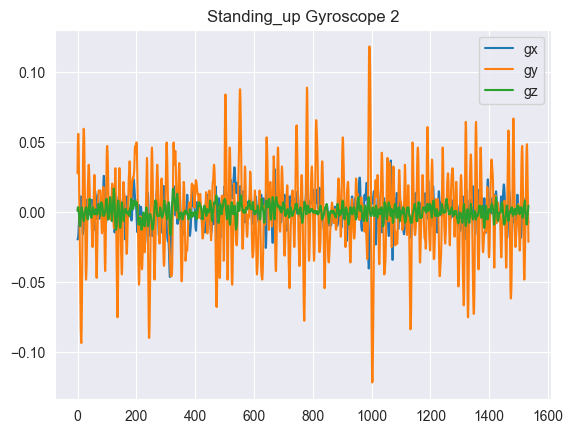

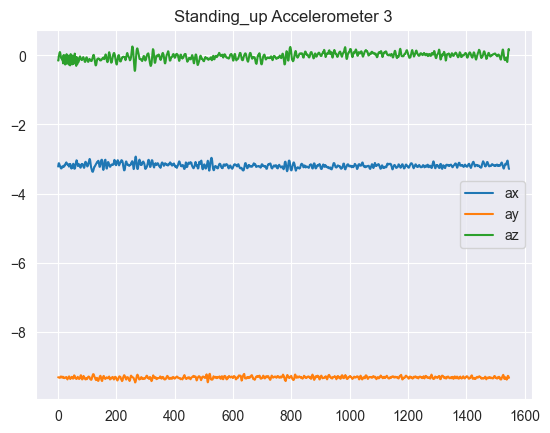

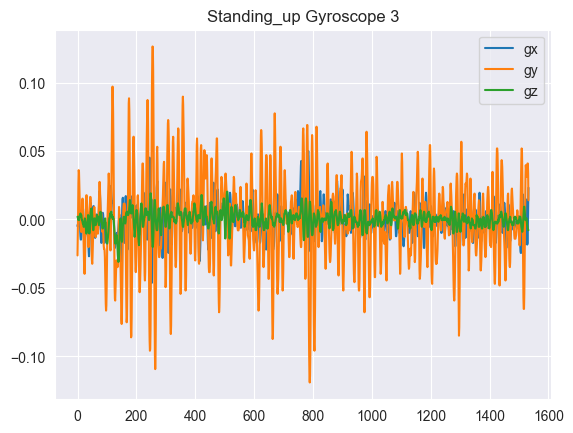

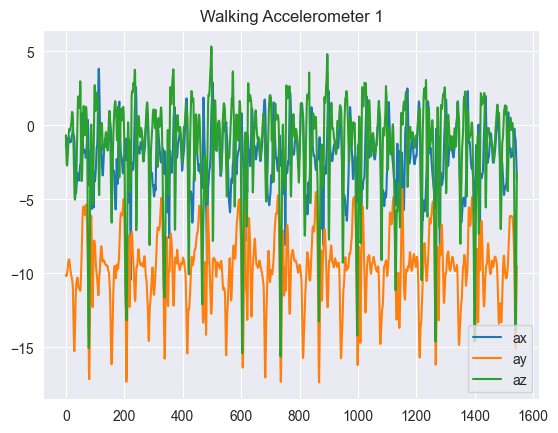

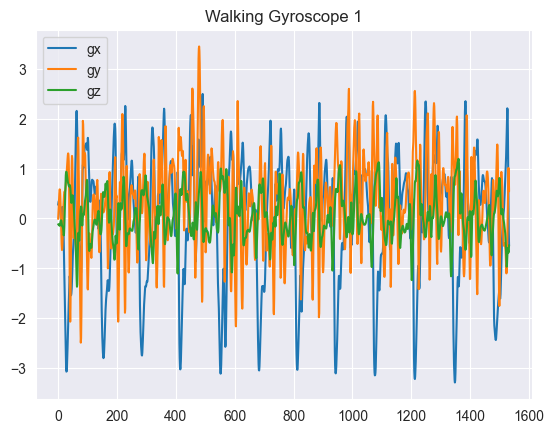

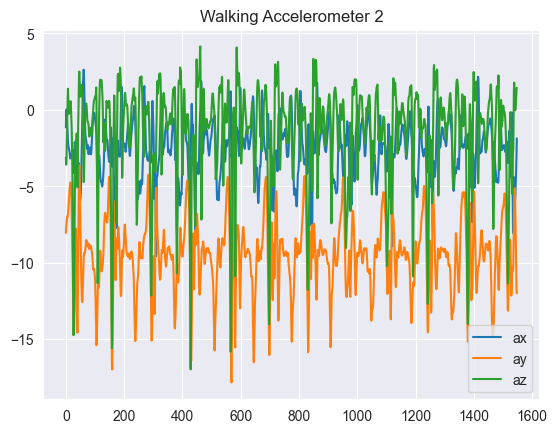

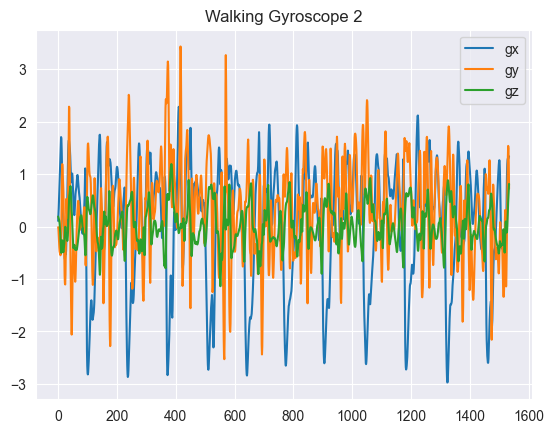

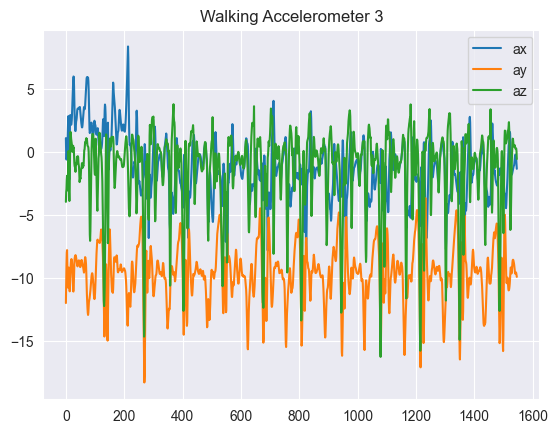

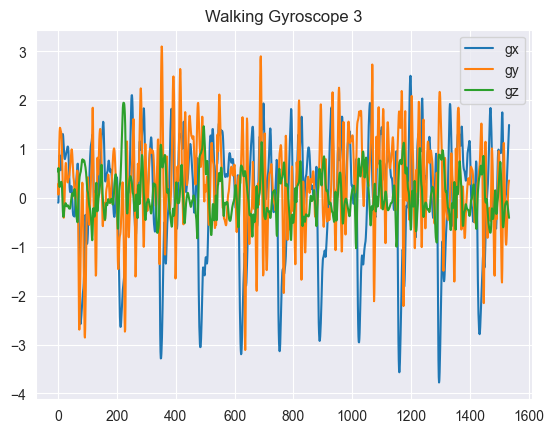

In [58]:
original_dataframes = read_recordings()

for key in original_dataframes:
    original_dataframes[key].plot(title = key)

##### What are we measuring with the accelerometer and rate_gyro?
Accelerometer measures the rotation of the device. Hence, we can determine the orientation of the device.
In Laying down position, the z-axis reports 9.8m/s^2, hence the screen-side of the phone is pointing down.



# Preprocessing the data
#### Once again plot the data for each recording. You should see some irregular data in the beginning of the recording and in the end of the recording.

##### Why do you have these irregularities in your recordings? Or maybe you do not, how come?
Collected the data with the 7 seconds delay in the beginning to get in position. As for the walking movement, I started walking before collecting the data. However, some recordings still have irregularities in the beginning

##### Create a python function that can read one accelerometer file and one rategyro file, remove a specific number of samples in the beginning and in the end and output a dataframe with six columns, that is all the accelerometer and ratygyro attributes. What do you need as input to the function?

In [2]:
def pre_process_file(acc_file : str, rate_gyro_file : str, n : int) -> pd.DataFrame:
    acc_frame = read_csv(acc_file, acc_names)
    rate_gyro_frame = read_csv(rate_gyro_file, rate_gyro_names)

    acc_frame = acc_frame.drop(acc_frame.head(n).index).drop(acc_frame.tail(n).index)
    rate_gyro_frame = rate_gyro_frame.drop(rate_gyro_frame.head(n).index).drop(rate_gyro_frame.tail(n).index)

    return pd.concat([acc_frame, rate_gyro_frame], axis = "columns", ignore_index=False)#, join="inner")

NameError: name 'pd' is not defined

In [60]:
for pos in positions:
    for x in range(1, 4):
        processed_dataframe = pre_process_file(f"Data/ML_Lab_1_{pos}_{x}/Accelerometer.csv", f"Data/ML_Lab_1_{pos}_{x}/Gyroscope.csv", 3)
        pre_processed_dataframes[f"{pos}-{x}"] = processed_dataframe

##### Processed dataframes

In [61]:
for i in pre_processed_dataframes:
    print(i)
    print(pre_processed_dataframes[i])

Laying_down-1
            ax        ay         az        gx        gy        gz
3     0.066700 -0.497707  -9.903594 -0.007330  0.003054 -0.004123
4     0.021236 -0.492921  -9.970892 -0.007330 -0.001833 -0.000458
5    -0.007478 -0.500100 -10.028319 -0.004887 -0.015271  0.003207
6    -0.019442 -0.512064  -9.822238 -0.002443 -0.021380  0.006872
7    -0.050548 -0.524028  -9.800702 -0.000000 -0.007941  0.009315
...        ...       ...        ...       ...       ...       ...
1622  0.090628 -0.368495  -9.762417  0.028099 -0.005498  0.004429
1623  0.095414 -0.390030  -9.819845  0.028099 -0.003054  0.004429
1624  0.124128 -0.435494  -9.920643  0.018325  0.005498  0.004429
1625  0.150449 -0.502493 -10.004392       NaN       NaN       NaN
1626  0.205484 -0.571885 -10.068997       NaN       NaN       NaN

[1624 rows x 6 columns]
Laying_down-2
            ax        ay        az        gx        gy        gz
3     0.507278 -0.564706 -9.831809  0.007330  0.004276  0.001985
4     0.543171 -0.538385 

##### Store each dataframe, one for each recording, in a binary file using the to_pickle function.

In [62]:
for i in pre_processed_dataframes:
    pre_processed_dataframes[i].to_pickle(f"Binaries/{i}.bin")

# Python
#### Divide the data into two sets, training set and test set. Store 2 of 3 files in the training folder and 1 of 3 files in the test folder. Note: it is the binary pickle files we talk about

##### Create a python function that can read all binary-files from one class. The with information of which class the data belongs to. The dataframe has now 7 columns.

In [1]:
def test(all_dataframes : list[str]):
    

    pass
    

SyntaxError: expected ':' (829031593.py, line 1)